<a href="https://colab.research.google.com/github/dimajira/DataScience/blob/main/_Optional_Peer_Graded_Assignment_jupyterlite_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# **Task 1:** Become familiar with the dataset

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **Task 2:** Generate descriptive statistics and visualizations

1. For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of Owner-Occupied homes')

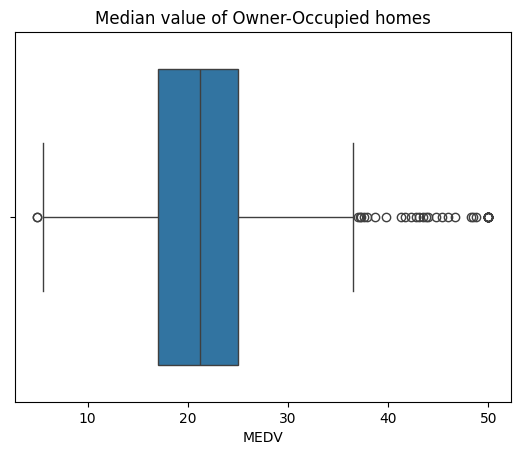

In [17]:
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title("Median value of Owner-Occupied homes")

2. Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River dummy variable')

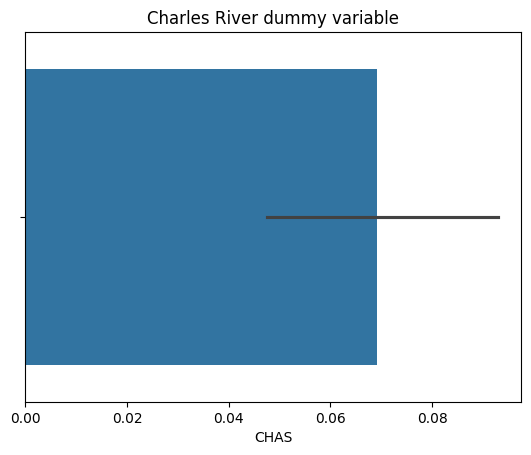

In [24]:
ax = sns.barplot(x="CHAS", data=boston_df)
ax.set_title("Charles River dummy variable")

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes vs. Proportion of Owner-Occupied Units Build Prior 1940')

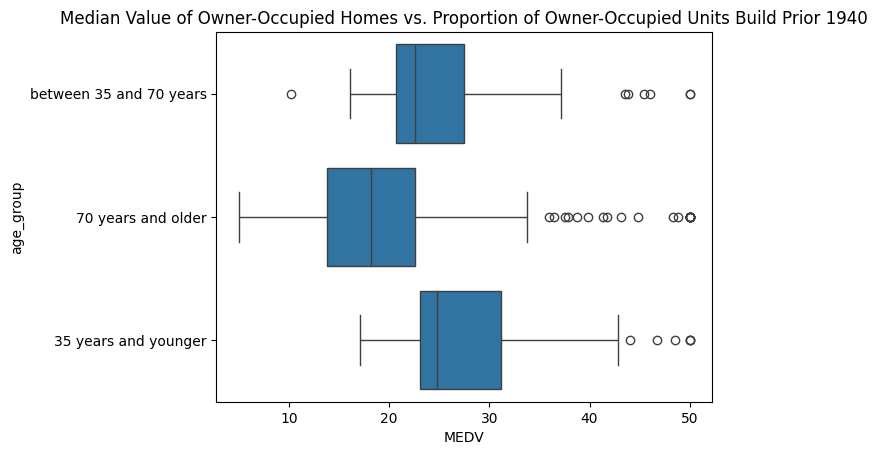

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set_title('Median Value of Owner-Occupied Homes vs. Proportion of Owner-Occupied Units Build Prior 1940')

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship Between Nitric Oxide Concentrations and Proportion of Non-retail Business Acres')

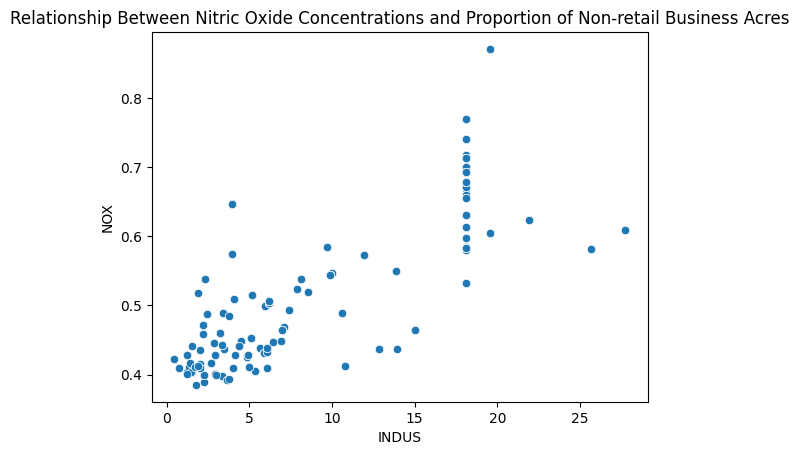

In [33]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Relationship Between Nitric Oxide Concentrations and Proportion of Non-retail Business Acres')

I can conclude that if the town has less non-retail business acres, the nitric oxides concentration is less. The nitric oxides concentration can be common in towns with a lot of non-retail business.

5. Create a histogram for the pupil to teacher ratio variable

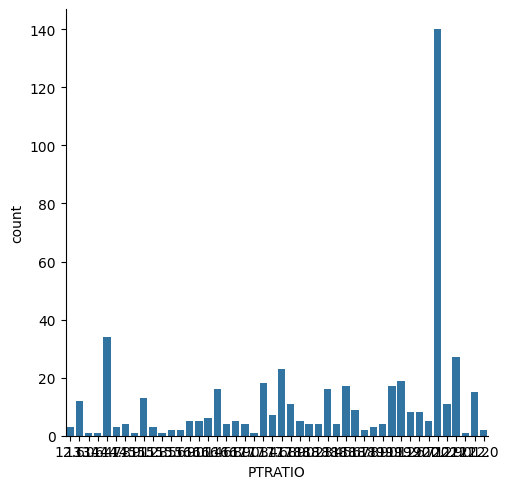

In [6]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)

## **Task 3:** Use the appropriate tests to answer the questions provided.

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: There is no difference in median value of houses bounded by the Charles river.

In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Based on the previous result, the p-value is 0.0000739, so the null hypothesis is rejected.

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis: Samples in all age groups are drawn from Median values of houses

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'
age_group_1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age_group_2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age_group_3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistics, p_value = scipy.stats.f_oneway(age_group_1, age_group_2, age_group_3)
print(p_value)

1.7105011022702984e-15


Based on the previous result, the p-value is less than 0.05, so the null hypothesis is rejected

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: There is not correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Based on the previous result, the p-value is less than 0.05, so the null hypothesis is rejected

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [19]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        02:46:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient is 1.0916, it means that you win that mark in the median value of owned occupied homes, because the distance from the main 5 employment centers.